In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

In [3]:
# Reference data files 
crime_data_path = "Resources/one_year_dc-crimes-search-results.csv"
weather_data_path = "output_data/dc_weather.csv"

# Read the data files
crime_data = pd.read_csv(crime_data_path)
weather_data = pd.read_csv(weather_data_path)


In [4]:
#Part 1 - Review crime data 
crime_data.head()

,NEIGHBORHOOD_CLUSTER,offensegroup,CENSUS_TRACT,LONGITUDE,END_DATE,offense-text,YBLOCK,DISTRICT,SHIFT,WARD,...,BLOCK,START_DATE,CCN,OFFENSE,OCTO_RECORD_ID,ANC,REPORT_DAT,METHOD,location,LATITUDE
0,cluster 25,violent,7901.0,-76.982939,"6/9/2017, 12:30:32 AM",homicide,136535.0,5.0,midnight,7.0,...,1500 - 1599 block of f street ne,"6/9/2017, 12:20:00 AM",17097719,homicide,17097719-02,7D,"2/28/2022, 12:00:00 AM",gun,"38.8966629446915,-76.9829390726156",38.896663
1,cluster 12,property,1301.0,-77.066471,"2/11/2021, 3:30:54 PM",theft/other,142375.0,2.0,evening,3.0,...,4530 - 4599 block of connecticut avenue nw,"2/11/2021, 3:00:52 PM",21018758,theft/other,21018758-01,3F,"2/11/2021, 5:01:11 PM",others,"38.9492538840124,-77.0664713491705",38.949254
2,cluster 23,violent,8803.0,-76.993728,"2/11/2021, 8:13:14 PM",robbery,138310.0,5.0,evening,5.0,...,400 - 1229 block of new york avenue ne,"2/11/2021, 6:03:44 PM",21018836,robbery,21018836-01,5D,"2/11/2021, 8:39:17 PM",gun,"38.9126538450039,-76.9937275504385",38.912654
3,cluster 17,violent,1803.0,-77.036393,NaN,robbery,144135.0,4.0,midnight,4.0,...,6100 - 6199 block of 16th street nw,"2/12/2021, 5:09:33 AM",21018968,robbery,21018968-01,4A,"2/12/2021, 6:44:29 AM",gun,"38.9651216586054,-77.0363931448094",38.965122
4,cluster 31,violent,9601.0,-76.937164,"2/18/2021, 6:29:56 AM",robbery,137846.0,6.0,midnight,7.0,...,1300 - 1499 block of kenilworth avenue ne,"2/18/2021, 4:39:52 AM",21021603,robbery,21021603-01,7C,"2/18/2021, 6:29:52 AM",others,"38.9084572462064,-76.9371638943852",38.908457


In [5]:
crime_data.describe()

,CENSUS_TRACT,LONGITUDE,YBLOCK,DISTRICT,WARD,YEAR,PSA,ucr-rank,XBLOCK,CCN,LATITUDE
count,56215.000000,56252.000000,56252.000000,56058.000000,56221.000000,56252.000000,56042.000000,56252.000000,56252.000000,5.625200e+04,56252.000000
mean,7780.678431,-77.008136,137768.553952,3.678975,4.368848,2021.601276,372.573570,6.151586,399294.908355,2.171324e+07,38.907771
std,37736.710408,0.034417,3288.003198,1.840786,2.342423,0.598779,183.749976,1.383371,2985.035193,6.948388e+05,0.029618
min,101.000000,-77.113642,127432.000000,1.000000,1.000000,2021.000000,101.000000,1.000000,390147.000000,4.000307e+06,38.814659
25%,3802.000000,-77.030799,136329.000000,2.000000,2.000000,2021.000000,208.000000,6.000000,397329.000000,2.111875e+07,38.894807
50%,7201.000000,-77.011794,137767.000000,3.000000,5.000000,2022.000000,308.000000,6.000000,398977.000000,2.201617e+07,38.907743
75%,9102.000000,-76.986919,139563.000000,5.000000,6.000000,2022.000000,505.000000,7.000000,401135.000000,2.212407e+07,38.923939
max,980000.000000,-76.910021,147441.000000,7.000000,8.000000,2023.000000,708.000000,9.000000,407806.000000,9.915749e+07,38.994901


In [6]:
weather_data.head()

,Date_ID,date,maxtemp_f,mintemp_f,avgtemp_f,totalprecip_in,avghumidity,day_condition,0_temp_f,0_condition,...,21_precip_in,21_humidity,22_temp_f,22_condition,22_precip_in,22_humidity,23_temp_f,23_condition,23_precip_in,23_humidity
0,0,2022-02-06,40.5,24.1,32.8,0.0,52.0,Sunny,26.4,Clear,...,0.0,63,28.6,Clear,0.0,65,28.2,Clear,0.0,67
1,1,2022-02-07,46.9,27.7,38.0,0.0,61.0,Cloudy,27.9,Clear,...,0.0,64,36.3,Partly cloudy,0.0,67,36.2,Partly cloudy,0.0,70
2,2,2022-02-08,45.0,32.9,39.1,0.0,59.0,Cloudy,36.1,Partly cloudy,...,0.0,54,33.8,Partly cloudy,0.0,58,33.6,Partly cloudy,0.0,61
3,3,2022-02-09,54.1,30.6,43.2,0.0,63.0,Overcast,33.4,Partly cloudy,...,0.0,72,42.4,Clear,0.0,77,40.7,Clear,0.0,82
4,4,2022-02-10,54.5,34.9,45.3,0.0,68.0,Partly cloudy,39.0,Clear,...,0.0,59,41.7,Clear,0.0,61,40.2,Clear,0.0,64


In [7]:
weather_data.describe()

,Date_ID,maxtemp_f,mintemp_f,avgtemp_f,totalprecip_in,avghumidity,0_temp_f,0_precip_in,0_humidity,1_temp_f,...,20_humidity,21_temp_f,21_precip_in,21_humidity,22_temp_f,22_precip_in,22_humidity,23_temp_f,23_precip_in,23_humidity
count,365.000000,365.000000,365.000000,365.00000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,...,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,182.000000,68.567397,50.307123,60.68000,0.029233,65.534247,54.042466,0.002356,73.416438,53.498630,...,64.367123,56.853973,0.003452,68.441096,55.933425,0.001589,70.071233,55.008493,0.001699,71.753425
std,105.510663,18.195781,14.370236,16.65224,0.070543,13.959008,14.445887,0.011360,16.314450,14.371262,...,16.997318,14.947829,0.015123,17.029546,14.708164,0.007537,16.072308,14.522128,0.008508,15.862546
min,0.000000,22.800000,13.600000,18.30000,0.000000,34.000000,16.000000,0.000000,36.000000,15.700000,...,33.000000,15.800000,0.000000,33.000000,15.900000,0.000000,36.000000,15.900000,0.000000,36.000000
25%,91.000000,53.800000,38.500000,46.70000,0.000000,55.000000,42.100000,0.000000,61.000000,41.500000,...,52.000000,44.800000,0.000000,56.000000,43.700000,0.000000,59.000000,42.700000,0.000000,60.000000
50%,182.000000,68.500000,50.900000,61.40000,0.000000,65.000000,55.800000,0.000000,72.000000,55.400000,...,62.000000,57.400000,0.000000,65.000000,56.700000,0.000000,69.000000,56.400000,0.000000,71.000000
75%,273.000000,84.400000,63.100000,76.00000,0.020000,76.000000,66.600000,0.000000,88.000000,66.000000,...,76.000000,70.000000,0.000000,82.000000,68.700000,0.000000,83.000000,67.600000,0.000000,85.000000
max,364.000000,104.900000,75.700000,92.00000,0.600000,97.000000,81.100000,0.170000,100.000000,80.100000,...,99.000000,83.500000,0.210000,99.000000,81.900000,0.100000,99.000000,80.800000,0.130000,100.000000


In [8]:
#Address question 1 - What are general crime data trends in Washington DC for the last year?
#First group crimes by type (property and violent) and count the number of occurrences of each


crime_type = crime_data.groupby("offensegroup")

count_crime_type = crime_type[["offensegroup"]].count()
count_crime_type

,offensegroup
offensegroup,
property,48313
violent,7939


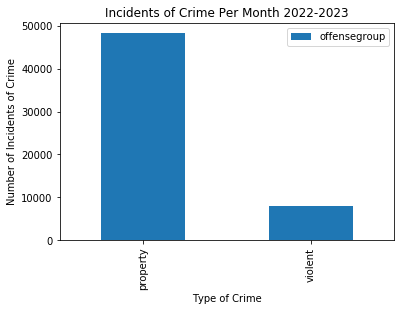

<Figure size 432x288 with 0 Axes>

In [9]:
#Address question 1 - What are general crime data trends in Washington DC for the last year?
# Create a bar chart based off of the group series created
count_chart = count_crime_type.plot(kind='bar')

# Set the xlabel and ylabel

# count_chart.set_xlabel("Month")  # **** MONTH DATA COLUMN TO BE CREATED/CALC'D ****
count_chart.set_ylabel("Number of Incidents of Crime")
count_chart.set_xlabel("Type of Crime")

# Add title
plt.title("Incidents of Crime Per Month 2022-2023")

plt.show()
plt.tight_layout()